<a href="https://colab.research.google.com/github/Ric-Royal/Moringa-IP/blob/master/Moringa_School_DS_Core_WK_4_IP_Richard_Kabiru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Loading datasets and importing libraries

In [1]:
# Importing libraries
import pandas as pd
import scipy
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

taxi = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
taxi.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


### 2. Checking the data.

In [3]:
# Checking the first rows in the dataset
taxi.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
# Checking the last rows of the dataset
taxi.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [5]:
# Getting the information in regards to the dataset.
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
# Checking the data types of each column
taxi.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [7]:
# Checking the number of records in the dataset
taxi.shape

(16085, 13)

In [8]:
# Checking for duplicates
taxi.duplicated().any()

False

In [9]:
# Checking for null values
taxi.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [11]:
# Checking for unique values
taxi.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

###3. Tidying the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


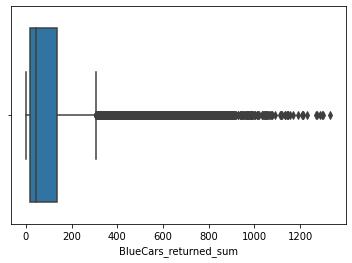

In [12]:
# Checking for outliers
sns.boxplot(taxi['BlueCars_returned_sum'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


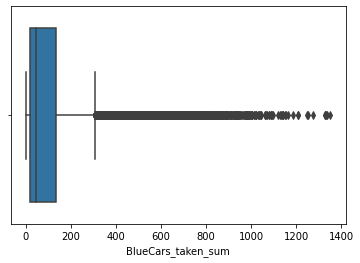

In [13]:
# Checking for outliers
sns.boxplot(taxi['BlueCars_taken_sum'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


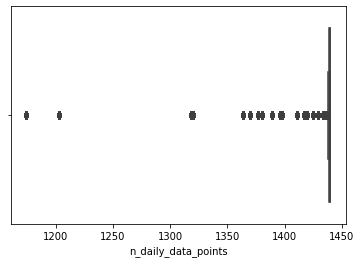

In [14]:
# Checking for outliers
sns.boxplot(taxi['n_daily_data_points'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


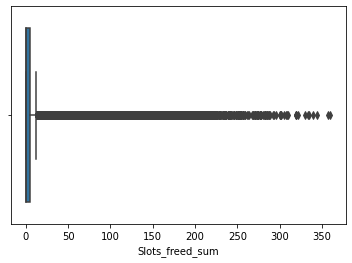

In [15]:
# Checking for outliers
sns.boxplot(taxi['Slots_freed_sum'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


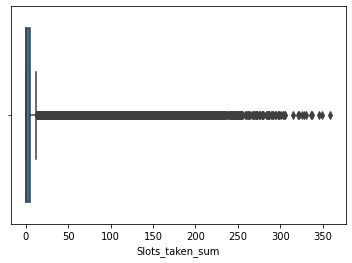

In [16]:
# Checking for outliers
sns.boxplot(taxi['Slots_taken_sum'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


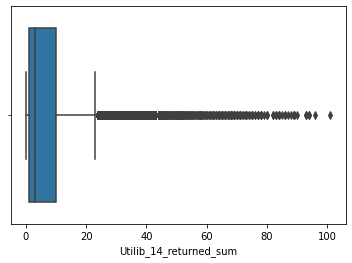

In [17]:
# Checking for outliers
sns.boxplot(taxi['Utilib_14_returned_sum'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


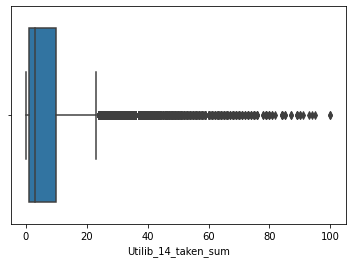

In [18]:
# Checking for outliers
sns.boxplot(taxi['Utilib_14_taken_sum'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


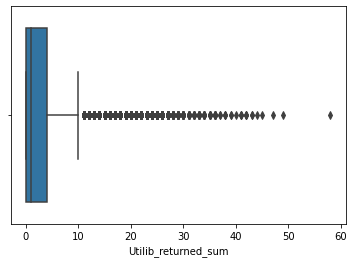

In [19]:
# Checking for outliers
sns.boxplot(taxi['Utilib_returned_sum'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


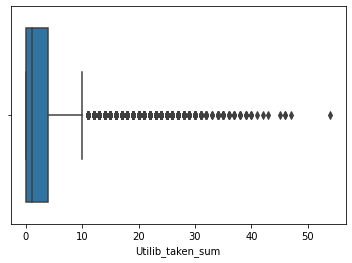

In [20]:
# Checking for ooutliers
sns.boxplot(taxi['Utilib_taken_sum'])

In [21]:
# Getting the IQR Score
Q1 = taxi.quantile(0.25)
Q3 = taxi.quantile(0.75)
IQR = Q3 - Q1
IQR

Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64

In [22]:
# Removing the outliers
taxi_df = taxi[~((taxi < (Q1 - 1.5 * IQR)) | (taxi > (Q3 - 1.5 * IQR)))]
taxi_df.shape

(16085, 13)

In [23]:
# Checking if there are any missing values after removing outliers
taxi.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [24]:
# Checking the number of records after removing outliers
taxi.shape

(16085, 13)

###4. Univariate and Bivariate Analysis 

Univariate analysis.

In [25]:
# Getting the Descriptive statistics for the dataset
taxi.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


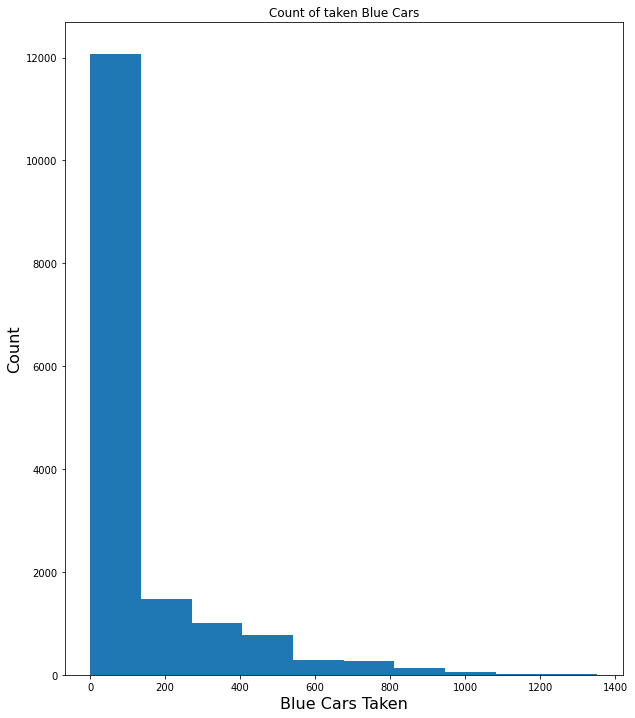

In [26]:
# Plotting of count of blue cars taken
fig, ax = plt.subplots(figsize=(10,12))
ax.hist(taxi['BlueCars_taken_sum'])
ax.set_xlabel('Blue Cars Taken', fontsize= 16)
ax.set_ylabel('Count', fontsize= 16)
ax.set_title('Count of taken Blue Cars', fontsize= 18)
plt.show()

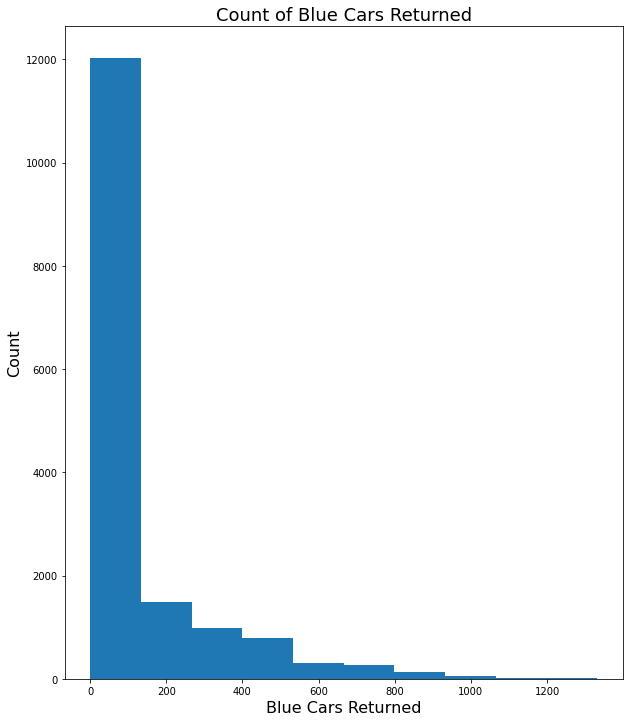

In [27]:
# Plotting the count of blue cars returned
fig, ax = plt.subplots(figsize=(10,12))
ax.hist(taxi['BlueCars_returned_sum'])
ax.set_xlabel('Blue Cars Returned', fontsize= 16)
ax.set_ylabel('Count', fontsize= 16)
ax.set_title('Count of Blue Cars Returned', fontsize= 18)
plt.show()

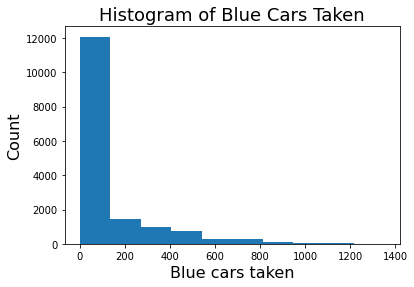

In [28]:
# plotting the histogram of blue cars taken
blue_cars_taken = taxi['BlueCars_taken_sum']
plt.hist(blue_cars_taken, bins=10, histtype='bar', rwidth= 2)
plt.xlabel('Blue cars taken', fontsize= 16)
plt.ylabel('Count', fontsize= 16)
plt.title('Histogram of Blue Cars Taken', fontsize= 18)
plt.show()

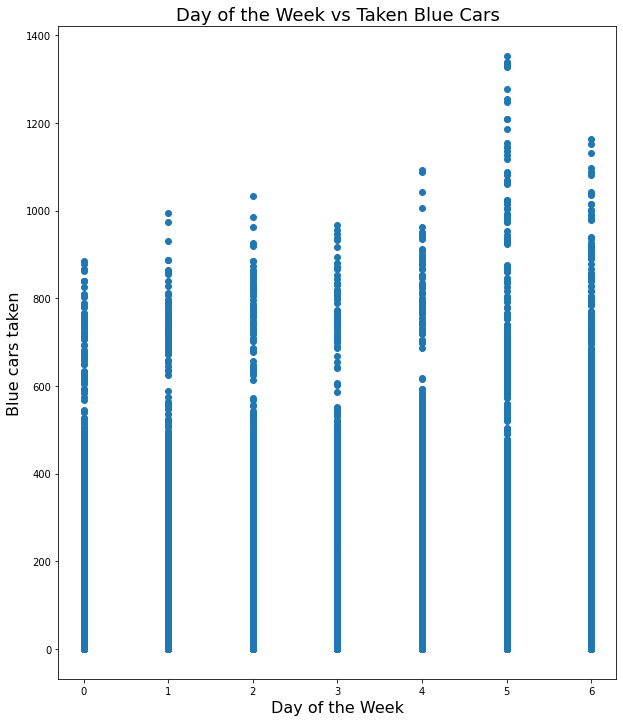

In [29]:
# Plot of of day of weeks vs blue cars taken
day = taxi['dayOfWeek']
bluecar_taken = taxi['BlueCars_taken_sum']
fig, ax = plt.subplots(figsize=(10,12))
ax.scatter(day, bluecar_taken)
ax.set_xlabel('Day of the Week', fontsize= 16)
ax.set_ylabel('Blue cars taken', fontsize= 16)
ax.set_title('Day of the Week vs Taken Blue Cars', fontsize= 18)
plt.show()

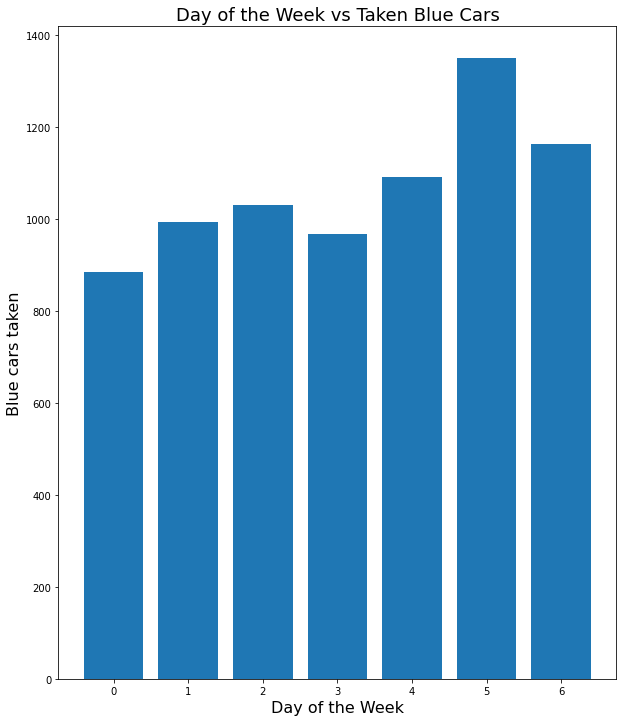

In [30]:
# plot of day of the week vs taken blue cars
day = taxi['dayOfWeek']
bluecar_taken = taxi['BlueCars_taken_sum']
fig, ax = plt.subplots(figsize=(10,12))
ax.bar(day, bluecar_taken)
ax.set_xlabel('Day of the Week', fontsize= 16)
ax.set_ylabel('Blue cars taken', fontsize= 16)
ax.set_title('Day of the Week vs Taken Blue Cars', fontsize= 18)
plt.show()

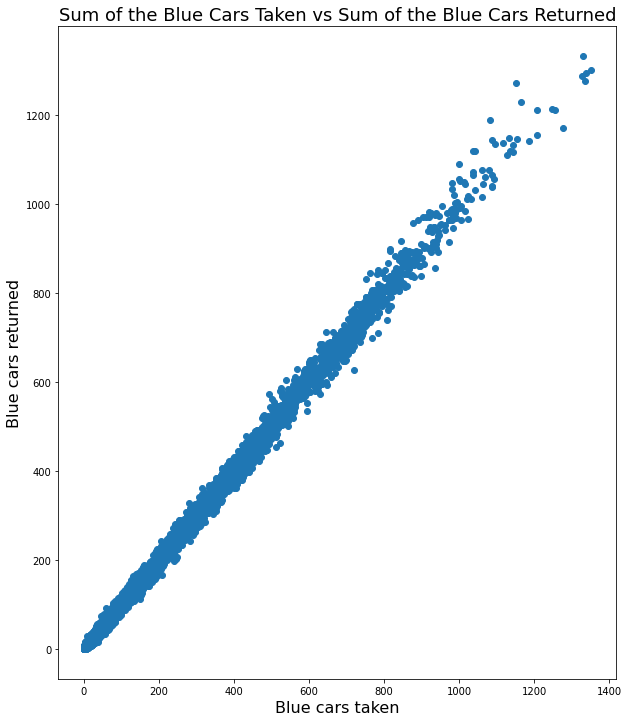

In [31]:
# Scatter plot of blue cars returned and blue cars taken
bluecar_returned = taxi['BlueCars_returned_sum']
bluecar_taken = taxi['BlueCars_taken_sum']
fig, ax = plt.subplots(figsize=(10,12))
ax.scatter(bluecar_taken, bluecar_returned)
ax.set_xlabel('Blue cars taken', fontsize= 16)
ax.set_ylabel('Blue cars returned', fontsize= 16)
ax.set_title('Sum of the Blue Cars Taken vs Sum of the Blue Cars Returned', fontsize=18)
plt.show()

###5. Hypothesis Testing

In [32]:
# Getting a description of the dataset
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [33]:
# Shapiro-Wilk normality test
from scipy.stats import shapiro
stat, p = shapiro(taxi['BlueCars_taken_sum'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.5:
  print('probably gaussian')
else:
  print('probably not gaussian')

stat=0.661, p=0.000
probably not gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
# Shapiro-Wilk normality test
from scipy.stats import shapiro
stat, p = shapiro(taxi['BlueCars_returned_sum'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.5:
  print('probably gaussian')
else:
  print('probably not gaussian')

stat=0.660, p=0.000
probably not gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 6. Sampling

In [35]:
# Random sampling
import random
taxi_sample = taxi.sample(n = 4826, replace="False")
print(taxi_sample)

       Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
15340        94700   2/5/2018  ...                0                0
8239         92350   6/3/2018  ...                0                0
12908        93800  4/11/2018  ...                1                1
12368        93500  1/26/2018  ...                0                0
2372         75016   2/2/2018  ...              211              211
...            ...        ...  ...              ...              ...
14129        94160  3/16/2018  ...                2                2
11802        93360  6/19/2018  ...                0                0
12978        94000  1/12/2018  ...                0                0
7595         92310  4/24/2018  ...                0                0
11730        93360  3/28/2018  ...                0                0

[4826 rows x 13 columns]


In [36]:
taxi_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4826 entries, 15340 to 11730
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             4826 non-null   int64 
 1   date                    4826 non-null   object
 2   n_daily_data_points     4826 non-null   int64 
 3   dayOfWeek               4826 non-null   int64 
 4   day_type                4826 non-null   object
 5   BlueCars_taken_sum      4826 non-null   int64 
 6   BlueCars_returned_sum   4826 non-null   int64 
 7   Utilib_taken_sum        4826 non-null   int64 
 8   Utilib_returned_sum     4826 non-null   int64 
 9   Utilib_14_taken_sum     4826 non-null   int64 
 10  Utilib_14_returned_sum  4826 non-null   int64 
 11  Slots_freed_sum         4826 non-null   int64 
 12  Slots_taken_sum         4826 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 527.8+ KB


In [37]:
# Describing the sample univariate statistics
taxi_sample.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000
mean,88681.389764,1431.487982,2.952756,126.808952,126.945504,3.752383,3.744094,8.673228,8.670742,23.525280,23.583092
std,7739.127668,32.360245,2.005445,188.207220,188.544247,5.941007,5.959465,12.945383,12.912506,52.962553,53.109817
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,45.000000,45.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,131.000000,132.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1277.000000,1230.000000,47.000000,44.000000,100.000000,94.000000,357.000000,346.000000


In [38]:
# Normalizing the features
from sklearn import preprocessing

d = preprocessing.normalize(taxi_sample[['BlueCars_returned_sum', 'BlueCars_taken_sum']], axis=0)
taxisamp_df = pd.DataFrame(d, columns= ['BlueCars_returned_sum', 'BlueCars_taken_sum'])
taxisamp_df.head()

,BlueCars_returned_sum,BlueCars_taken_sum
0,0.001837,0.001649
1,0.003167,0.003045
2,0.000950,0.000952
3,0.002913,0.002347
4,0.056178,0.056076


Hypothesis: The mean number of blue cars taken from all stations/postal codes is 125.926951. The level of significance is 0.05.

In [39]:
# Getting the statistic
z_score = (127.713634 - 125.926951) / 185.418995
z_score
print('Z score = ', z_score)

Z score =  0.009635922144869767


In [40]:
# Getting the p-value
p = scipy.stats.norm.cdf(z_score)
alpha = 0.05
if p > alpha:
  print(p, 'is greater than alpha. Accept the null hypothesis')
else:
  print(p, 'is less than alpha. Reject the null hypothesis')

0.5038441172658004 is greater than alpha. Accept the null hypothesis


The average number of blue cars returned to postal code 75015 is greater than or equal to the average number of blue cars returned to postal code 75017

In [48]:
# Getting the average of the bluecars_returned at postal code 75017
blue75017 = taxi['BlueCars_returned_sum'].groupby(taxi['Postal code'] == 75017)
blue75017.mean()

Postal code
False    119.955113
True     734.237179
Name: BlueCars_returned_sum, dtype: float64

In [49]:
# Getting the average of the bluecars_returned at postal code 75015
blue75015 = taxi['BlueCars_returned_sum'].groupby(taxi['Postal code'] == 75015)
blue75015.mean()

Postal code
False    118.360412
True     897.070513
Name: BlueCars_returned_sum, dtype: float64

In [50]:
# Getting the standard deviation of the bluecars_returned at postal code 75015
blue75015 = taxi['BlueCars_returned_sum'].groupby(taxi['Postal code'] == 75015)
blue75015.std()

Postal code
False    168.896509
True     187.025929
Name: BlueCars_returned_sum, dtype: float64

In [51]:
# Getting the standard deviation of the bluecars_returned at postal code 75017
blue75017 = taxi['BlueCars_returned_sum'].groupby(taxi['Postal code'] == 75017)
blue75017.std()

Postal code
False    175.819096
True     134.335118
Name: BlueCars_returned_sum, dtype: float64

In [53]:
# Getting the z statistics.
z_score = (897.070513 - 734.237179) / math.sqrt(((187.025929**2)/4826) + ((134.335118**2)/4826))

z_score

49.12450452908712

In [54]:
# Getting the p value
p = scipy.stats.norm.cdf(z_score)
alpha = 0.05
if p > alpha:
  print(p, 'is greater than alpha. Accept the null hypothesis')
else:
  print(p, 'is less than alpha. Reject the null hypothesis')

1.0 is greater than alpha. Accept the null hypothesis
